In [387]:
from mkad import *
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from mkad import *
from copy import deepcopy
%matplotlib inline

In [346]:
mkad = MultipleKernelAnomalyDetector(sax_size=4, paa_size=7, nu=0.5)

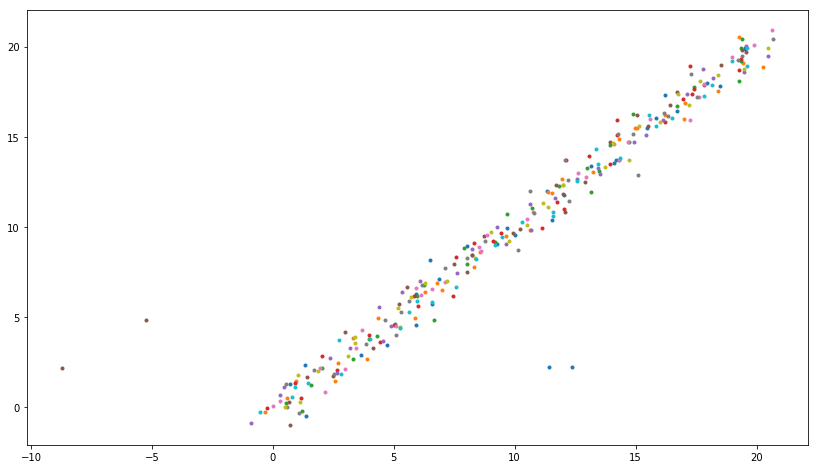

In [383]:
F = 10
T = 2
N = 30

data = np.zeros((F, T, N))

for f in range(F):
    for t in range(T):
        data[f][t] = np.linspace(start=0, stop=20, num=N) + sps.norm.rvs(size=N, scale=0.5)
        
anomalies = [(0, 3), (0, 4), (5, 7), (5, 2)]
for a in anomalies:
    if a[0] % 2 == 0:
        data[a[0]][0][a[1]] += 10
    else:
        data[a[0]][0][a[1]] -= 10
        
    
plt.figure(figsize=(14, 8))
for i in range(F):
    plt.plot(data[i][0], data[i][1], '.')
plt.show()

In [388]:
data1 = deepcopy(data)

In [386]:
mkad = MultipleKernelAnomalyDetector(kernel='lcs', sax_size=4, paa_size=7)
mkad.fit(data)
pred = mkad.predict(data)
pred

array([-1,  1,  1,  1,  1, -1,  1,  1,  1,  1])

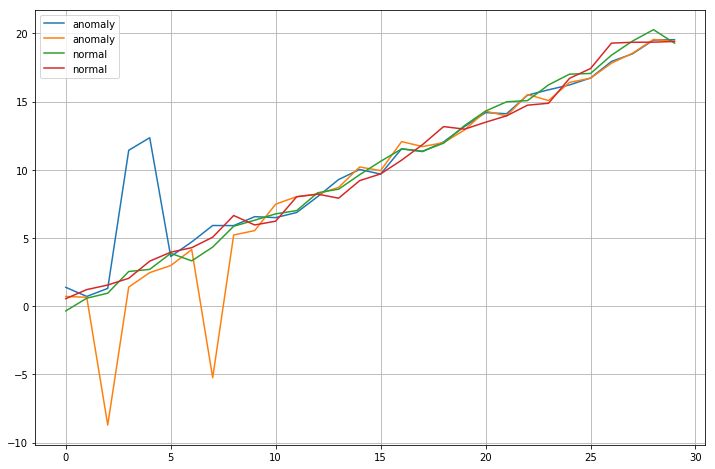

In [400]:
plt.figure(figsize=(12,8))
plt.plot(data1[0][0], label='anomaly')
plt.plot(data1[5][0], label='anomaly')
plt.plot(data1[1][0], label='normal')
plt.plot(data1[2][0], label='normal')
plt.legend()
plt.grid(True)
plt.show()